# Using TMPL in a Jupyter notebook

This notebook gives a basic example of how to use a TMPL test sequence. It uses a predefined test sequence that can be found in the same directory as this notebook: *example_resistor_test.py*. 

In [1]:
# Use this to import tmpl if it has not been installed by pip
import set_path_for_notebooks
import tmpl

/home/redlegjed/Documents/Python/Projects/test_measure_process_lib


In [ ]:
# Use this if tmpl has been installed by pip
import tmpl

# Example test sequence
We can use the *example_resistor_test* module to create a *TestManager* object. This is then used to demonstrate:

* HTML display of *TestManager* object
* Display table of the running order of the sequence
* Running the test sequence
* Displaying the results measured during the sequence

In [2]:
# Import example test sequence
import example_resistor_test

Create dummy resistor models and lab instruments as resources for the *TestManager* object

In [3]:

# Define resistor model
res1 = example_resistor_test.ResistorModel(100,tolerance_pc=1.0)

# Setup resources
resources = {
    'set_temperature':example_resistor_test.set_temperature,
    'set_humidity': example_resistor_test.set_humidity,
    'voltage_supply':example_resistor_test.VoltageSupply(),
    'resistor':res1,
    }

# Setup optional custom configuration values
config_custom = {'param1':1,'param2':2}


In [ ]:

# Create TestManager object
test = example_resistor_test.ExampleTestSequence(resources,
                                            config=config_custom)

## HTML representation

TMPL TestManager objects have an HTML representation for Jupyter notebooks

In [4]:
test

TestManager[ExampleResistorTest]
* Conditions:
	Iteration
	temperature_degC
	humidity_pc
* Measurements:
	Timestamp
	TurnOn
	Stabilise
	VoltageSweep
	TurnOff

## Running order
Display the test sequence order as a table. This is useful for checking that measurements are in the correct sequence

In [6]:
test.df_running_order

[SEQ] ExampleTestSequence       | Generating the sequence running order
[SEQ] ExampleTestSequence       | 	Running order done


,Operation,Label,Iteration,temperature_degC,humidity_pc
0,MEASUREMENT,Timestamp,None,NaN,NaN
1,MEASUREMENT,TurnOn,None,NaN,NaN
2,CONDITION,temperature_degC,None,25.0,NaN
3,MEASUREMENT,Stabilise,None,25.0,NaN
4,CONDITION,humidity_pc,None,NaN,55.0
5,MEASUREMENT,VoltageSweep,None,25.0,55.0
6,CONDITION,humidity_pc,None,NaN,60.0
7,MEASUREMENT,VoltageSweep,None,25.0,60.0
8,CONDITION,humidity_pc,None,NaN,70.0
9,MEASUREMENT,VoltageSweep,None,25.0,70.0


## Run test sequence

In [5]:
test.run()

[SEQ] ExampleTestSequence       | <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
[SEQ] ExampleTestSequence       | Running ExampleResistorTest
[SEQ] ExampleTestSequence       | Generating the sequence running order
[SEQ] ExampleTestSequence       | 	Running order done
[M] Timestamp                 | <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
[M] Timestamp                 | Running Timestamp
[M] Timestamp                 | Timestamp	Time taken: 0.001 s 
[M] Timestamp                 | >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

[M] TurnOn                    | <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
[M] TurnOn                    | Running TurnOn
[M] TurnOn                    | TurnOn measurement
[M] TurnOn                    | TurnOn	Time taken: 0.001 s 
[M] TurnOn                    | >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

------------------------------------------------------------
[C] TemperatureConditions     | Setpoint = 25 degC
[M] Stabilise                 | <<<<<<<<<<<<<<<<<<<<<<<<<<<<

## Display results
Display the [xarray](https://docs.xarray.dev/en/stable/index.html) Dataset recorded from all measurements

In [7]:
test.ds_results

<xarray.Dataset>
Dimensions:           (default: 1, timestamp: 1, temperature_degC: 3,
                       humidity_pc: 3, swp_voltage: 10, serial_number: 1,
                       part_number: 1)
Coordinates:
  * default           (default) int64 0
  * timestamp         (timestamp) <U19 '2022-12-21 14h53m08'
  * temperature_degC  (temperature_degC) int64 25 35 45
  * humidity_pc       (humidity_pc) int64 55 60 70
  * swp_voltage       (swp_voltage) float64 0.0 0.1111 0.2222 ... 0.8889 1.0
  * serial_number     (serial_number) <U10 'example_sn'
  * part_number       (part_number) <U10 'example_pn'
Data variables:
    current_A         (temperature_degC, humidity_pc, swp_voltage) float64 0....
    resistance_ohms   (temperature_degC, humidity_pc) float64 0.007902 ... 0....
    current_mA        (temperature_degC, humidity_pc, swp_voltage) float64 0....

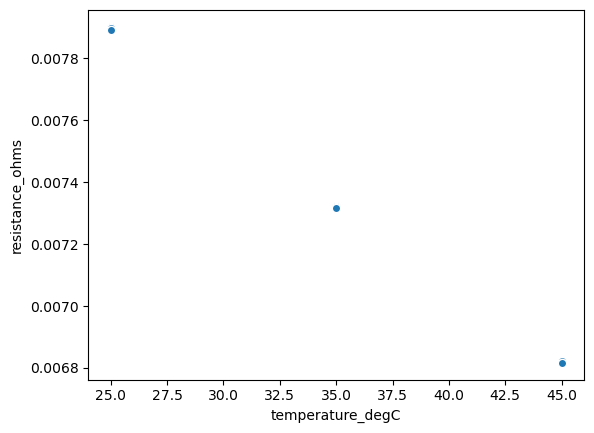

In [10]:
# Plot results
test.ds_results.resistance_ohms.plot.scatter(x='temperature_degC')